In [31]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [32]:
# Load data from CSV file
data = pd.read_csv("/Housing.csv")

In [33]:
# Print column names
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [34]:
# Check if the column "SalePrice" is present
if "SalePrice" in data.columns:
    X = data.drop("SalePrice", axis=1).values
    y = data["SalePrice"].values
else:
    # Adjust the column names accordingly
    print("Column 'SalePrice' not found. Please adjust column names.")
    # Assuming the target column is named differently, replace "TargetColumnName" with the actual name
    target_column_name = "TargetColumnName"
    if target_column_name in data.columns:
        X = data.drop(target_column_name, axis=1).values
        y = data[target_column_name].values
    else:
        print(f"Target column '{target_column_name}' not found. Please adjust column names.")

Column 'SalePrice' not found. Please adjust column names.
Target column 'TargetColumnName' not found. Please adjust column names.


In [35]:
# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
# train-test split for model evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

In [37]:
# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [38]:
# Define the model
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 24),  # Adjust input dimensions
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)


In [39]:
# Loss function and optimizer
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [40]:
n_epochs = 100
batch_size = 10
batch_start = torch.arange(0, len(X_train), batch_size)

In [41]:
# Hold the best model
best_mse = np.inf
best_weights = None
history = []


In [42]:
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))
    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    mse = loss_fn(y_pred, y_test)
    mse = float(mse)
    history.append(mse)
    if mse < best_mse:
        best_mse = mse
        best_weights = copy.deepcopy(model.state_dict())

MSE: 0.30
RMSE: 0.55


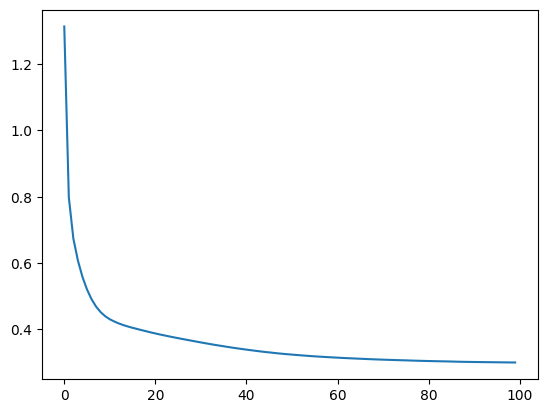

In [43]:
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()

In [18]:
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [19]:
if "SalePrice" in data.columns:
    X = data.drop("SalePrice", axis=1).values
    y = data["SalePrice"].values
else:
    # Adjust the column names accordingly
    print("Column 'SalePrice' not found. Please adjust column names.")
    # Assuming the target column is named differently, replace "TargetColumnName" with the actual name
    target_column_name = "TargetColumnName"
    if target_column_name in data.columns:
        X = data.drop(target_column_name, axis=1).values
        y = data[target_column_name].values
    else:
        print(f"Target column '{target_column_name}' not found. Please adjust column names.")

Column 'SalePrice' not found. Please adjust column names.
Target column 'TargetColumnName' not found. Please adjust column names.


In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=42)

In [22]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

In [23]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 24),  # Adjust input dimensions
    nn.ReLU(),
    nn.Linear(24, 12),
    nn.ReLU(),
    nn.Linear(12, 6),
    nn.ReLU(),
    nn.Linear(6, 1)
)

In [24]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [25]:
n_epochs = 100
batch_size = 10
batch_start = torch.arange(0, len(X_train), batch_size)

In [26]:
best_mse = np.inf
best_weights = None
history = []

In [27]:
for epoch in range(n_epochs):
    model.train()
    with tqdm.tqdm(batch_start, unit="batch", mininterval=0, disable=True) as bar:
        bar.set_description(f"Epoch {epoch}")
        for start in bar:
            # take a batch
            X_batch = X_train[start:start+batch_size]
            y_batch = y_train[start:start+batch_size]
            # forward pass
            y_pred = model(X_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # print progress
            bar.set_postfix(mse=float(loss))

In [29]:
model.eval()
y_pred = model(X_test)
mse = loss_fn(y_pred, y_test)
mse = float(mse)
history.append(mse)
if mse < best_mse:
    best_mse = mse
    best_weights = copy.deepcopy(model.state_dict())


MSE: 0.31
RMSE: 0.56


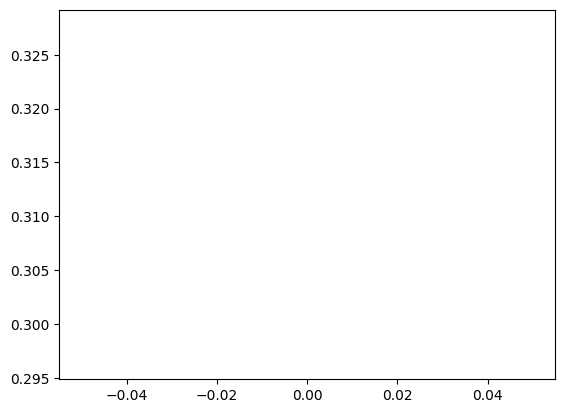

In [30]:
model.load_state_dict(best_weights)
print("MSE: %.2f" % best_mse)
print("RMSE: %.2f" % np.sqrt(best_mse))
plt.plot(history)
plt.show()